### 2025/11/10 [Lesson 23](https://www.bilibili.com/list/1163352997/?sid=482825&spm_id_from=333.1387.0.0&oid=262585154&bvid=BV1gY411f7ty&desc=0)
内容:  
- 统计量的特点
- 常见统计量(样本均值，样本方差，样本标准差，卡方分布，t分布，F分布)
- 样本独立同分布时，样本均值和样本方差/标准差构造的统计量服从特殊分布

[Lesson 24](https://www.bilibili.com/list/1163352997/?sid=482825&spm_id_from=333.1387.0.0&oid=775120751&bvid=BV1n14y1W7rb&desc=0) 习题课

---

### 统计量的特点
样本函数若不含未知数，叫 **统计量**（即 统计量不可以含未知数）

---

### F分布：两个卡方变量“标准化后”的比值

1. 定义  
设
- $U \sim \chi^2(m)$，自由度为 $m$；
- $V \sim \chi^2(n)$，自由度为 $n$；
- $U$ 与 $V$ 相互独立。

定义随机变量
$$
F = \frac{U/m}{V/n}.
$$

则称 $F$ 服从自由度为 $(m,n)$ 的 F 分布（F-distribution），记为
$$
F \sim F(m,n).
$$

直观理解：
- $U/m$ 可以看作“第一个方差估计”；
- $V/n$ 可以看作“第二个方差估计”；
- F 分布就是这两个方差估计的比值的分布，用来比较“两个方差是否差不多”。


2. 与卡方分布、正态分布的关系  
如果
$$
\frac{(m-1)S_1^2}{\sigma_1^2} \sim \chi^2(m-1), \quad
\frac{(n-1)S_2^2}{\sigma_2^2} \sim \chi^2(n-1),
$$
且独立，那么
$$
\frac{S_1^2/\sigma_1^2}{S_2^2/\sigma_2^2}
= \frac{\dfrac{(m-1)S_1^2}{\sigma_1^2}/(m-1)}{\dfrac{(n-1)S_2^2}{\sigma_2^2}/(n-1)}
\sim F(m-1,n-1).
$$
特别地，当来自正态总体时，样本方差与卡方分布紧密相关，因此“方差比”自然落在 F 分布框架中。

3. 可视化    
F 分布只在 $x>0$ 有密度；  
形状取决于两个自由度 $m,n$；  
常见的F分布PDF，CDF可视化如下：

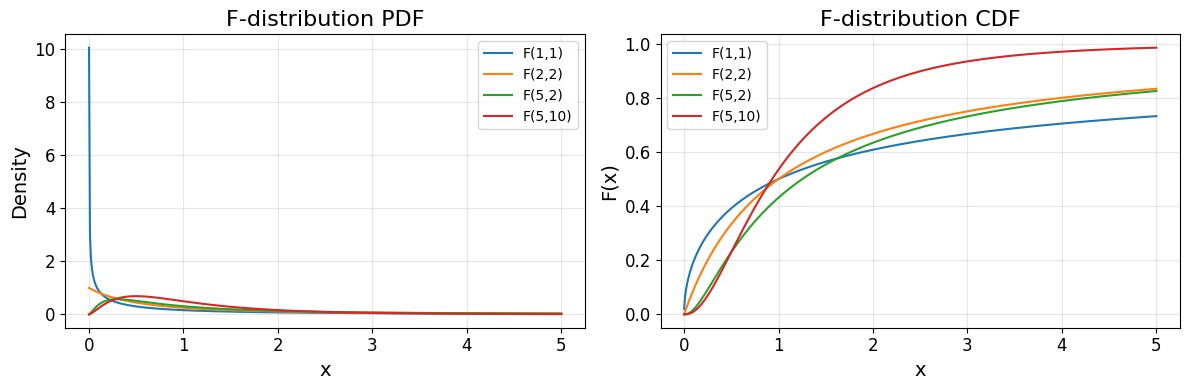

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# 常用的 F 分布自由度组合
dfs = [(1, 1), (2, 2), (5, 2), (5, 10)]

# x 轴范围
x = np.linspace(0.001, 5, 500)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

label_size = 14
tick_size = 12

# 左：PDF
for d1, d2 in dfs:
    pdf = f.pdf(x, d1, d2)
    axes[0].plot(x, pdf, label=f'F({d1},{d2})')

axes[0].set_title('F-distribution PDF', fontsize=16)
axes[0].set_xlabel('x', fontsize=label_size)
axes[0].set_ylabel('Density', fontsize=label_size)
axes[0].tick_params(axis='both', labelsize=tick_size)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=10)

# 右：CDF
for d1, d2 in dfs:
    cdf = f.cdf(x, d1, d2)
    axes[1].plot(x, cdf, label=f'F({d1},{d2})')

axes[1].set_title('F-distribution CDF', fontsize=16)
axes[1].set_xlabel('x', fontsize=label_size)
axes[1].set_ylabel('F(x)', fontsize=label_size)
axes[1].tick_params(axis='both', labelsize=tick_size)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()

### 回顾：常见的样本函数/统计量
1. 样本均值
$$
\bar{X} = \frac{X_1 + X_2 + \cdots + X_n}{n}
$$

2. 样本方差 ($n-1$自由度)
$$
S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2
$$

3. 标准差
$$
S = \sqrt{S^2}
$$
---


> 练习：$X_1,\dots,X_n$ 来自同一总体，满足
> $$E(X_i)=\mu,\quad D(X_i)=\sigma^2,$$
> 证明：$$E(S^2)=\sigma^2.$$

#### 证法1: AI给出
##### 第一步：恒等式分解
先证明一个恒等式：
$$
\sum_{i=1}^n (X_i - \bar X)^2
= \sum_{i=1}^n (X_i - \mu)^2 - n(\bar X - \mu)^2.
$$

证明如下：

因为  
$$
X_i - \bar X = (X_i - \mu) - (\bar X - \mu),
$$  
所以
$$
\begin{aligned}
\sum_{i=1}^n (X_i - \bar X)^2
&= \sum_{i=1}^n \big[(X_i - \mu) - (\bar X - \mu)\big]^2 \\
&= \sum_{i=1}^n \Big[(X_i - \mu)^2 - 2(X_i - \mu)(\bar X - \mu) + (\bar X - \mu)^2\Big] \\
&= \sum_{i=1}^n (X_i - \mu)^2
   - 2(\bar X - \mu)\sum_{i=1}^n (X_i - \mu)
   + \sum_{i=1}^n (\bar X - \mu)^2.
\end{aligned}
$$

注意到  
$$
\sum_{i=1}^n (X_i - \mu) = n(\bar X - \mu),
$$  
以及  
$$
\sum_{i=1}^n (\bar X - \mu)^2 = n(\bar X - \mu)^2,
$$  
代入得：
$$ 
\begin{aligned}
\sum_{i=1}^n (X_i - \bar X)^2
&= \sum_{i=1}^n (X_i - \mu)^2
   - 2(\bar X - \mu)\cdot n(\bar X - \mu)
   + n(\bar X - \mu)^2 \\
&= \sum_{i=1}^n (X_i - \mu)^2 - n(\bar X - \mu)^2.
\end{aligned}
$$ 

恒等式成立

##### 第二步：写出 $S^2$ 的另一种形式

由样本方差定义：
$$
S^2 = \frac{1}{n-1}\sum_{i=1}^n (X_i - \bar X)^2.
$$

利用上面的恒等式：
$$
S^2
= \frac{1}{n-1}\left[
\sum_{i=1}^n (X_i - \mu)^2 - n(\bar X - \mu)^2
\right].
$$

##### 第三步：对两边取期望

对上式两边取期望：
$$
E(S^2)
= \frac{1}{n-1}\left[
E\Big(\sum_{i=1}^n (X_i - \mu)^2\Big)
- n\,E\big((\bar X - \mu)^2\big)
\right].
$$

分别计算两个期望项。

##### 1）计算 $E\big(\sum_{i=1}^n (X_i - \mu)^2\big)$

因为 $E(X_i)=\mu,\ D(X_i)=\sigma^2$，有
$$
E\big[(X_i - \mu)^2\big] = D(X_i) = \sigma^2.
$$

于是
\begin{aligned}
E\Big(\sum_{i=1}^n (X_i - \mu)^2\Big)
&= \sum_{i=1}^n E\big[(X_i - \mu)^2\big] \\
&= \sum_{i=1}^n \sigma^2 \\
&= n\sigma^2.
\end{aligned}

##### 2）计算 $E\big((\bar X - \mu)^2\big)$

注意到
$$
E\big((\bar X - \mu)^2\big) = D(\bar X).
$$

而样本均值的方差为
$$
D(\bar X) = \frac{\sigma^2}{n}.
$$

所以
$$
E\big((\bar X - \mu)^2\big) = \frac{\sigma^2}{n}.
$$

##### 第四步：合并结果

将上述结果代回 $E(S^2)$ 的表达式：

\begin{aligned}
E(S^2)
&= \frac{1}{n-1}\left[
n\sigma^2 - n \cdot \frac{\sigma^2}{n}
\right] \\
&= \frac{1}{n-1}\left[
n\sigma^2 - \sigma^2
\right] \\
&= \frac{1}{n-1}(n-1)\sigma^2 \\
&= \sigma^2.
\end{aligned}

得证。

这个性质说明了样本方差 $S^2$ 是总体方差 $\sigma^2$ 的无偏估计 (unbiased estimator)。这也就是为什么在计算样本方差时，分母是 $n-1$ (自由度) 而不是 $n$ 的原因。

---

#### 证法2：按照定义一步步计算


> 练习：$X_1,\dots,X_n$ 独立同分布，且 $X_i \sim N(\mu, \sigma^2)$
> 证明：  
（1）  $$\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$$  （2）  $$\frac{(n-1)S^2}{\sigma^2} \sim \chi^2(n-1)$$


#### (1) 证明：

1.  **利用正态分布的再生性（可加性）：**
    一个重要的性质是：若 $X_i$ 独立且 $X_i \sim N(\mu_i, \sigma_i^2)$，则它们的线性组合 $\sum a_i X_i$ 仍然服从正态分布：
    $$\sum a_i X_i \sim N\left(\sum a_i \mu_i, \sum a_i^2 \sigma_i^2\right)$$

2.  **套用性质到 $\bar{X}$：**
    样本均值 $\bar{X}$ 定义为 $\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i$。
    这是一个线性组合，其中 $a_i = \frac{1}{n}$，且 $X_i \sim N(\mu, \sigma^2)$。

3.  **计算 $\bar{X}$ 的期望（均值）：**
    $$E(\bar{X}) = E\left(\sum \frac{1}{n} X_i\right) = \sum \frac{1}{n} E(X_i)$$
    $$E(\bar{X}) = \sum_{i=1}^{n} \frac{1}{n} \mu = n \left( \frac{1}{n} \mu \right) = \mu$$

4.  **计算 $\bar{X}$ 的方差：**
    因为 $X_i$ 相互独立，所以：
    $$D(\bar{X}) = D\left(\sum \frac{1}{n} X_i\right) = \sum \left(\frac{1}{n}\right)^2 D(X_i)$$
    $$D(\bar{X}) = \sum_{i=1}^{n} \frac{1}{n^2} \sigma^2 = n \left( \frac{1}{n^2} \sigma^2 \right) = \frac{\sigma^2}{n}$$

5.  **结论：**
    由于 $X_i$ 是正态分布，它们的线性组合 $\bar{X}$ 也服从正态分布。结合我们计算出的均值和方差：
    $$\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$$

---

#### (2) 证明：

要证明 $\frac{(n-1)S^2}{\sigma^2}$ 服从自由度为 $n-1$ 的卡方分布（$\chi^2(n-1)$），我们必须依赖一个**至关重要的前提条件**：

> **前提：** 原始样本 $X_1, X_2, \dots, X_n$ 是从一个**正态分布** $N(\mu, \sigma^2)$ 中抽取的。
>
> **如果原始数据不服从正态分布，这个结论一般是不成立的。**

前面证明的 $E(S^2) = \sigma^2$ 是下一个关键步骤。证明的思路是**将总的平方和分解，并利用卡方分布的可加性**。


### 推导步骤

#### 1. 关键的代数恒等式

这个恒等式在您上一个问题（证明 $E(S^2)=\sigma^2$）中已经出现过了。它是整个推导的核心：

$$\sum_{i=1}^{n} (X_i - \mu)^2 = \sum_{i=1}^{n} (X_i - \bar{X})^2 + n(\bar{X} - \mu)^2$$

* **左边：** 样本点到**总体均值 $\mu$** 的离差平方和。
* **右边第一项：** 样本点到**样本均值 $\bar{X}$** 的离差平方和。
* **右边第二项：** **样本均值 $\bar{X}$** 到**总体均值 $\mu$** 的离差平方。

#### 2. 将恒等式标准化（全部除以 $\sigma^2$）

我们将上式两边的每一项都除以 $\sigma^2$：

$$\frac{\sum_{i=1}^{n} (X_i - \mu)^2}{\sigma^2} = \frac{\sum_{i=1}^{n} (X_i - \bar{X})^2}{\sigma^2} + \frac{n(\bar{X} - \mu)^2}{\sigma^2}$$

为了看得更清楚，我们改写一下这些项：

$$\sum_{i=1}^{n} \left(\frac{X_i - \mu}{\sigma}\right)^2 = \frac{(n-1)S^2}{\sigma^2} + \left(\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}\right)^2$$

* **(注：** $\sum_{i=1}^{n} (X_i - \bar{X})^2$ 按照定义等于 $(n-1)S^2$。)

#### 3. 分析恒等式中的每一项

现在我们来分析这三项分别服从什么分布。

* **Term 1 (左边)：** $\sum_{i=1}^{n} \left(\frac{X_i - \mu}{\sigma}\right)^2$
    * 因为 $X_i \sim N(\mu, \sigma^2)$，所以 $Z_i = \frac{X_i - \mu}{\sigma} \sim N(0, 1)$。
    * 这一项是 $n$ 个**独立**的**标准正态分布**变量的平方和 ($\sum_{i=1}^{n} Z_i^2$)。
    * 根据卡方分布的定义，这一项服从自由度为 $n$ 的卡方分布： $\chi^2(n)$。

* **Term 3 (右边第二项)：** $\left(\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}\right)^2$
    * 根据中心极限定理（或者说，正态分布的再生性），我们知道样本均值 $\bar{X}$ 服从 $N(\mu, \frac{\sigma^2}{n})$。
    * 因此，$\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}$ 是一个**标准正态分布** $N(0, 1)$。
    * 这一项是一个 $N(0, 1)$ 变量的平方。根据定义，它服从自由度为 $1$ 的卡方分布： $\chi^2(1)$。

* **Term 2 (右边第一项)：** $\frac{(n-1)S^2}{\sigma^2}$
    * 这就是我们要求的目标。

#### 4. 运用科克伦定理 (Cochran's Theorem)

我们现在的关系是：

$$\chi^2(n) = \frac{(n-1)S^2}{\sigma^2} + \chi^2(1)$$

在数理统计中，有一个非常重要的定理（科克伦定理）证明了：对于来自正态分布的样本，**样本均值 $\bar{X}$ 和样本方差 $S^2$ 是相互独立的**。

这意味着我们上式右边的两项： $\frac{(n-1)S^2}{\sigma^2}$ 和 $\chi^2(1)$ 是**相互独立**的。

#### 5. 利用卡方分布的可加性

卡方分布有一个重要性质：如果 $A \sim \chi^2(a)$ 且 $B \sim \chi^2(b)$，并且 $A$ 和 $B$ 相互独立，那么 $A+B \sim \chi^2(a+b)$。

反过来（使用矩母函数 MGF 可以证明），如果 $C = A+B$，且 $C \sim \chi^2(c)$，$B \sim \chi^2(b)$，并且 $A$ 和 $B$ 相互独立，那么 $A \sim \chi^2(c-b)$。

* 我们有 $C = \chi^2(n)$
* 我们有 $B = \chi^2(1)$
* $A$ 和 $B$ 相互独立

因此， $A = \frac{(n-1)S^2}{\sigma^2}$ 必须服从卡方分布，其自由度为：

$$df(A) = df(C) - df(B) = n - 1$$

### 结论

我们证明了：
$$\frac{(n-1)S^2}{\sigma^2} \sim \chi^2(n-1)$$

**直观理解（为什么是 $n-1$）：**

* 我们从 $n$ 个独立的 $Z_i$（服从 $N(0,1)$）开始，它们的平方和 $\sum Z_i^2$ 具有 $n$ 个自由度。
* 但是，在计算 $S^2$ 时，我们**不知道**真正的 $\mu$，我们用样本均值 $\bar{X}$ 来**估计**它。
* 这 $n$ 个观测值 $(X_i - \bar{X})$ 并不是完全独立的，它们受一个约束：$\sum_{i=1}^{n} (X_i - \bar{X}) = 0$。
* 这个约束（用 $\bar{X}$ 替代 $\mu$）消耗了 $1$ 个自由度。
* 因此，总共 $n$ 个自由度，减去用于估计均值的 $1$ 个自由度，最终只剩下 $n-1$ 个自由度。

---

> **练习：**
> 设 $X_1,\dots,X_n$ 独立同分布, 且 $X_i \sim N(\mu, \sigma^2)$。
> $\bar{X}$ 是样本均值，$S$ 是样本标准差。
>
> **证明：**
> $$\frac{\sqrt{n} (\bar{X}-\mu)}{S} \sim t(n-1)$$


这个证明是前两个证明的自然延续

#### (a) t 分布的定义

首先，我们必须知道 $t$ 分布是如何**定义**的。
如果 $Z$ 是一个标准正态分布变量 ($Z \sim N(0, 1)$)，$V$ 是一个自由度为 $v$ 的卡方分布变量 ($V \sim \chi^2(v)$)，且 $Z$ 和 $V$ **相互独立**，则：

$$T = \frac{Z}{\sqrt{V/v}}$$

$T$ 就服从自由度为 $v$ 的 $t$ 分布，记为 $T \sim t(v)$。

我们的目标就是证明 $\frac{\sqrt{n} (\bar{X}-\mu)}{S}$ 可以被构造成 $T = \frac{Z}{\sqrt{V/(n-1)}}$ 的形式。

#### (b) 构造 Z 和 V

根据前两个练习题：

1.  **构造 $Z$ (标准正态分布)：**
    我们证明了 $\bar{X} \sim N(\mu, \frac{\sigma^2}{n})$。
    将其标准化（减去均值，除以标准差），我们得到：
    $$Z = \frac{\bar{X} - \mu}{\sqrt{\sigma^2/n}} = \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} = \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma}$$
    我们知道 $Z \sim N(0, 1)$。

2.  **构造 $V$ (卡方分布)：**
    我们也证明了：
    $$V = \frac{(n-1)S^2}{\sigma^2}$$
    我们知道 $V \sim \chi^2(n-1)$。这里的自由度 $v = n-1$。

#### (c) 独立性

根据**科克伦定理 (Cochran's Theorem)**，对于来自正态分布的样本，样本均值 $\bar{X}$ 和样本方差 $S^2$ 是**相互独立**的。

因此，由它们构造出来的 $Z$ 和 $V$ 也是相互独立的。

#### (d) 组合并化简

现在我们具备了定义 $t$ 分布的所有条件：
* $Z = \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma}$，服从 $N(0, 1)$
* $V = \frac{(n-1)S^2}{\sigma^2}$，服从 $\chi^2(n-1)$
* $v = n-1$
* $Z$ 和 $V$ 相互独立

我们把它们代入 $t$ 分布的定义式 $T = \frac{Z}{\sqrt{V/v}}$：

$$T = \frac{ \frac{\sqrt{n}(\bar{X} - \mu)}{\sigma} }{ \sqrt{ \frac{ \frac{(n-1)S^2}{\sigma^2} }{n-1} } }$$

化简得到：

$$T = \frac{\sqrt{n}(\bar{X} - \mu)}{S}$$

根据 $t$ 分布的定义， $T$ 服从自由度为 $v = n-1$ 的 $t$ 分布，证毕。

---